In [8]:
import os 
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [9]:
load_dotenv()

True

In [10]:
from dotenv import load_dotenv
load_dotenv()


alpaca_api_key = os.getenv("ALPACA_API")
alpaca_secret_key = os.getenv("ALPACA_SECRET")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [12]:
tickers = ["SPY"]

start_date = pd.Timestamp("2020-03-06", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-05", tz="America/New_York").isoformat()


timeframe = "1D"

ticker_data = api.get_barset(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


ticker_data.head()

SPY                                   
                             open    high     low   close     volume
time                                                                
2020-03-06 00:00:00-05:00  293.15  298.78  290.23  297.42  198657535
2020-03-09 00:00:00-04:00  275.30  284.19  273.45  274.40  277300725
2020-03-10 00:00:00-04:00  284.64  288.52  273.50  288.44  246644123
2020-03-11 00:00:00-04:00  280.70  281.94  270.88  274.36  231055382
2020-03-12 00:00:00-04:00  256.00  266.66  247.68  248.10  346670590

In [13]:
num_sims = 500 

MC_SPY = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018779,0.968307,1.041410,0.973472,1.006708,1.021214,0.998201,1.019773,0.996069,1.032099,...,0.978058,1.011655,1.012247,1.019815,1.018969,0.951126,0.991799,0.971396,1.013796,0.993354
2,1.020427,0.987125,1.037319,0.968147,1.011568,1.019253,1.006608,1.014068,1.026270,1.052977,...,0.968862,1.026104,1.023921,1.032563,1.030354,0.910187,0.989290,0.954188,1.057679,0.985528
3,1.013871,1.007277,1.039235,0.959591,1.014109,1.049809,1.046563,0.960542,0.996133,1.035612,...,0.962563,1.040704,1.052610,1.042036,1.055811,0.930469,0.992624,0.961068,1.067818,0.969284
4,1.018644,1.049047,1.001820,0.963459,1.004604,1.099481,1.042498,0.962585,0.997883,1.059342,...,0.973105,1.032493,1.063756,1.032932,1.037339,0.936152,0.980978,0.980494,1.072342,1.002022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.897240,1.776003,0.899239,1.284517,0.986274,1.087838,0.854193,0.727297,1.537863,2.088615,...,0.827009,2.032813,1.901200,0.787142,1.637294,1.565969,0.919020,1.836460,1.402064,1.436004
249,0.876918,1.773367,0.880378,1.293384,0.969193,1.096660,0.849986,0.735656,1.489339,2.092966,...,0.837147,1.970307,1.891724,0.761877,1.589300,1.602057,0.912716,1.835024,1.390078,1.474899
250,0.913896,1.715742,0.895116,1.285311,0.964323,1.078778,0.861729,0.732929,1.514977,2.091682,...,0.831196,1.956963,1.862964,0.738806,1.658917,1.635176,0.894825,1.825308,1.421360,1.453468
251,0.918966,1.736810,0.885080,1.264427,0.989664,1.090534,0.864806,0.736865,1.556300,2.089700,...,0.816785,1.897670,1.852733,0.740516,1.662540,1.619560,0.896189,1.831183,1.387500,1.457884


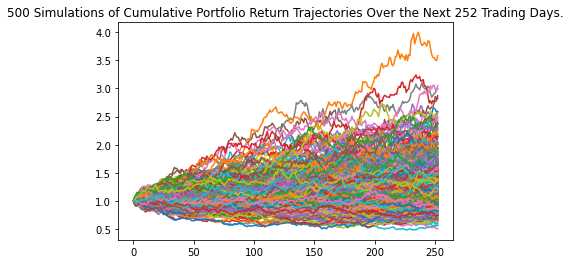

In [15]:
line_plot = MC_SPY.plot_simulation()

In [17]:
sim_return = {
    "mean": list(MC_SPY.simulated_return.mean(axis=1)),
    "median": list(MC_SPY.simulated_return.median(axis=1)),
    "min": list(MC_SPY.simulated_return.min(axis=1)),
    "max": list(MC_SPY.simulated_return.max(axis=1))
}

sim_return_df = pd.DataFrame(sim_return)

sim_return_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000295,1.000392,0.940951,1.077233
2,1.000739,1.001330,0.910187,1.103193
3,1.002131,1.002276,0.909512,1.154501
4,1.002940,1.000948,0.899805,1.146375


<AxesSubplot:title={'center':'Projected 1 Year Daily Returns of S&P 500 Index'}>

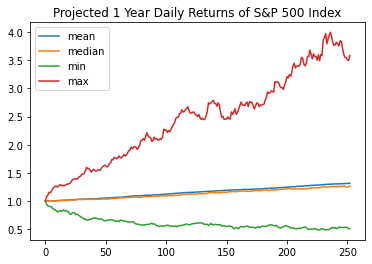

In [18]:
sim_return_df.plot(title="Projected 1 Year Daily Returns of S&P 500 Index")

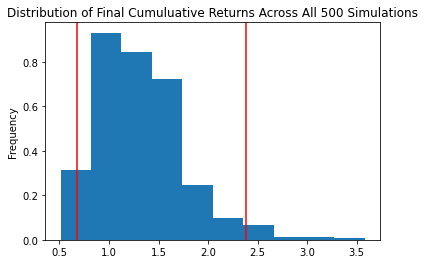

In [19]:
dist_plot = MC_SPY.plot_distribution()

In [23]:
initial_investment = 5000

cumulative_pl = initial_investment * sim_return_df

cumulative_pl.head()

,mean,median,min,max
0,5000.000000,5000.000000,5000.000000,5000.000000
1,5001.476650,5001.959079,4704.755287,5386.167257
2,5003.695578,5006.652387,4550.932607,5515.966930
3,5010.653645,5011.381990,4547.561019,5772.503497
4,5014.698191,5004.741216,4499.026458,5731.877105


<AxesSubplot:title={'center':'1 Year Sim Profits and Losses SPY'}>

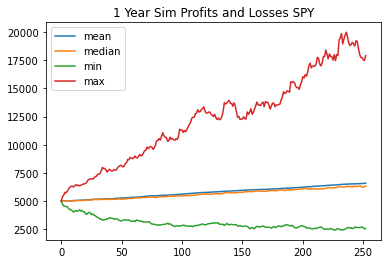

In [24]:
cumulative_pl.plot(title="1 Year Sim Profits and Losses of S&P 500")

In [25]:
table = MC_SPY.summarize_cumulative_return()

print(table)

count           500.000000
mean              1.315820
std               0.443643
min               0.510677
25%               0.970722
50%               1.260880
75%               1.569955
max               3.583101
95% CI Lower      0.676402
95% CI Upper      2.385243
Name: 252, dtype: float64


In [28]:
ci_lower = round(table[8]*5000,2)
ci_upper = round(table[9]*5000,2)

print(f"There is a 95% chance that an initial investment of $5000 in the SPY ETF over the next  year will end within the range of ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $5000 in the SPY ETF over the next  year will end within the range of $3382.01 and $11926.21.
